In [ ]:
!pip install opendatasets xgboost graphviz lightgbm --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
!pip list | grep scikit-learn

scikit-learn                     1.2.2


## Downloading the Data

In [ ]:
import os
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
od.download('https://www.kaggle.com/datasets/pratyushakar/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maheshkrishnam
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pratyushakar/rossmann-store-sales


100%|██████████| 6.90M/6.90M [00:01<00:00, 6.81MB/s]


In [ ]:
os.listdir()

['.config', 'rossmann-store-sales', 'sample_data']

In [ ]:
os.listdir('rossmann-store-sales')

['store.csv', 'train.csv', 'test.csv']

In [ ]:
train_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)
test_df = pd.read_csv('./rossmann-store-sales/test.csv')
store_df = pd.read_csv('./rossmann-store-sales/store.csv')


In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
merged_df_train = train_df.merge(store_df, how='left', on='Store')
merged_df_test = test_df.merge(store_df, how='left', on='Store')

In [ ]:
merged_df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
merged_df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


## Preprocessing and Feature Engineering

> Extracting Dy, Month, Year and Week out of the Date

In [ ]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Day'] = df.Date.dt.day
  df['Month'] = df.Date.dt.month
  df['Year'] = df.Date.dt.year
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(merged_df_train)
merged_df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year',
       'WeekOfYear'],
      dtype='object')

In [ ]:
split_date(merged_df_test)
merged_df_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Day', 'Month',
       'Year', 'WeekOfYear'],
      dtype='object')

> Store Open/Closed

In [ ]:
merged_df_train[merged_df_train.Open == 0].Sales.value_counts()

Sales
0    172817
Name: count, dtype: int64

- when the store is closed it is good to hardcode sales to 0 rather than training it

In [ ]:
merged_df_train[merged_df_train.Sales == 0].Sales.value_counts()

Sales
0    172871
Name: count, dtype: int64

In [ ]:
merged_df = merged_df_train[merged_df_train.Open == 1].copy()

> Competition

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015,31


In [ ]:
def comp_months(df):
  df['CompetitionOpen'] = 12*(df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)


In [ ]:
comp_months(merged_df)
comp_months(merged_df_test)

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,31,7,2015,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,31,7,2015,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,31,7,2015,31,3.0


### Additional Promotion

In [ ]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if pd.notna(row['Promo2Open']) and pd.notna(row['Month']) and row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0


def promo_cols(df):
    promo2_open_days = 12 * (df['Year'] - df['Promo2SinceYear']) + (df['WeekOfYear'] - df['Promo2SinceWeek']) * 7 / 30.5
    promo2_open_days = promo2_open_days.fillna(0).clip(lower=0)
    df['Promo2Open'] = promo2_open_days * df['Promo2']

    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']


In [ ]:
merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
Day                               0
Month                             0
Year                              0
WeekOfYear                        0
CompetitionOpen                   0
dtype: int64

In [ ]:
promo_cols(merged_df)
promo_cols(merged_df_test)

In [ ]:
merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
Day                               0
Month                             0
Year                              0
WeekOfYear                        0
CompetitionOpen                   0
Promo2Open                        0
IsPromo2Month                     0
dtype: int64

In [ ]:
merged_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,31,7,2015,31,82.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,NaN,31,7,2015,31,70.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,NaN,31,7,2015,31,3.0,0.0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,NaN,NaN,NaN,31,7,2015,31,19.0,0.0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,NaN,NaN,NaN,31,7,2015,31,27.0,0.0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,NaN,NaN,NaN,31,7,2015,31,9.0,0.0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,NaN,NaN,NaN,31,7,2015,31,179.0,0.0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,NaN,NaN,NaN,31,7,2015,31,70.0,0.0,0


## Input and Target Columns

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2',
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [ ]:
train_input = merged_df[input_cols]
test_input = merged_df_test[input_cols]

In [ ]:
train_input.shape, test_input.shape

((844392, 16), (41088, 16))

In [ ]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month', 'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']


In [ ]:
train_input[numeric_cols].isnull().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

- Here there is null values in CompetitionDistance which should be filled carefully, sometime its not good to till the null values with mean, we have also to think over it
- For CompetitionDistance

### Imputation

In [ ]:
max_dist = train_input.CompetitionDistance.max()
max_dist

75860.0

In [ ]:
train_input.CompetitionDistance.fillna(max_dist*2, inplace=True)


<ipython-input-36-bdacf3fa4f89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input.CompetitionDistance.fillna(max_dist*2, inplace=True)


In [ ]:
train_input.isnull().sum()

Store                  0
DayOfWeek              0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
dtype: int64

### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_input[numeric_cols])

In [ ]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])


<ipython-input-40-d4b86a35b213>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
<ipython-input-40-d4b86a35b213>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])


In [ ]:
train_input[numeric_cols].max()

Store                  1.0
Promo                  1.0
SchoolHoliday          1.0
CompetitionDistance    1.0
CompetitionOpen        1.0
Promo2                 1.0
Promo2Open             1.0
IsPromo2Month          1.0
Day                    1.0
Month                  1.0
Year                   1.0
WeekOfYear             1.0
dtype: float64

### Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_input[categorical_cols])


In [ ]:
encoded_cols = encoder.get_feature_names_out(categorical_cols).tolist()


In [ ]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])


In [ ]:
X_train = train_input[numeric_cols + encoded_cols]
X_test = test_input[numeric_cols + encoded_cols]

In [ ]:
y_train = merged_df[target_col]

In [ ]:
y_train.shape

(844392,)

In [ ]:
merged_df.shape

(844392, 25)

In [ ]:
X_train.columns

Index(['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month', 'Day',
       'Month', 'Year', 'WeekOfYear', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

# XGBoost
- It is based on the concept of DT along with the Boosting algorithm, that when one DT predict some value then the next DT takes that value and try to correct it or try to minimize the error

In [ ]:
!pip list | grep xgboost

xgboost                          2.0.3


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=25)


In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
pred = model.predict(X_train)
pred

array([5269.8984, 6073.798 , 8365.042 , ..., 5111.32  , 4498.008 ,
       5978.877 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(target, pred):
  return mean_squared_error(target, pred, squared=False)

In [ ]:
rmse(y_train, pred)

137.15520840450026

In [ ]:
y_train.describe()

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

<Axes: xlabel='Sales', ylabel='Count'>

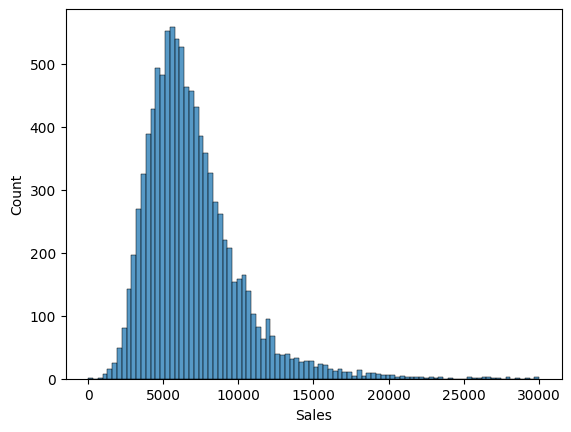

In [ ]:
sns.histplot(data=y_train.sample(10000))

### Visualization

In [ ]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,30

In [ ]:
# plot_tree(model, rankdir='LR', num_trees=0)

In [ ]:
# plot_tree(model, rankdir='LR', num_trees=1)

In [ ]:
# plot_tree(model, rankdir='LR', num_trees=2)

In [ ]:
trees = model.get_booster().get_dump()

In [ ]:
len(trees)

20

In [ ]:
print(trees[0])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
1,Promo,0.996190
24,StoreType_b,0.001537
18,DayOfWeek_7,0.000655
29,Assortment_c,0.000347
12,DayOfWeek_1,0.000205
19,StateHoliday_0,0.000160
5,Promo2,0.000142
17,DayOfWeek_6,0.000116
27,Assortment_a,0.000102
3,CompetitionDistance,0.000074


<Axes: xlabel='importance', ylabel='feature'>

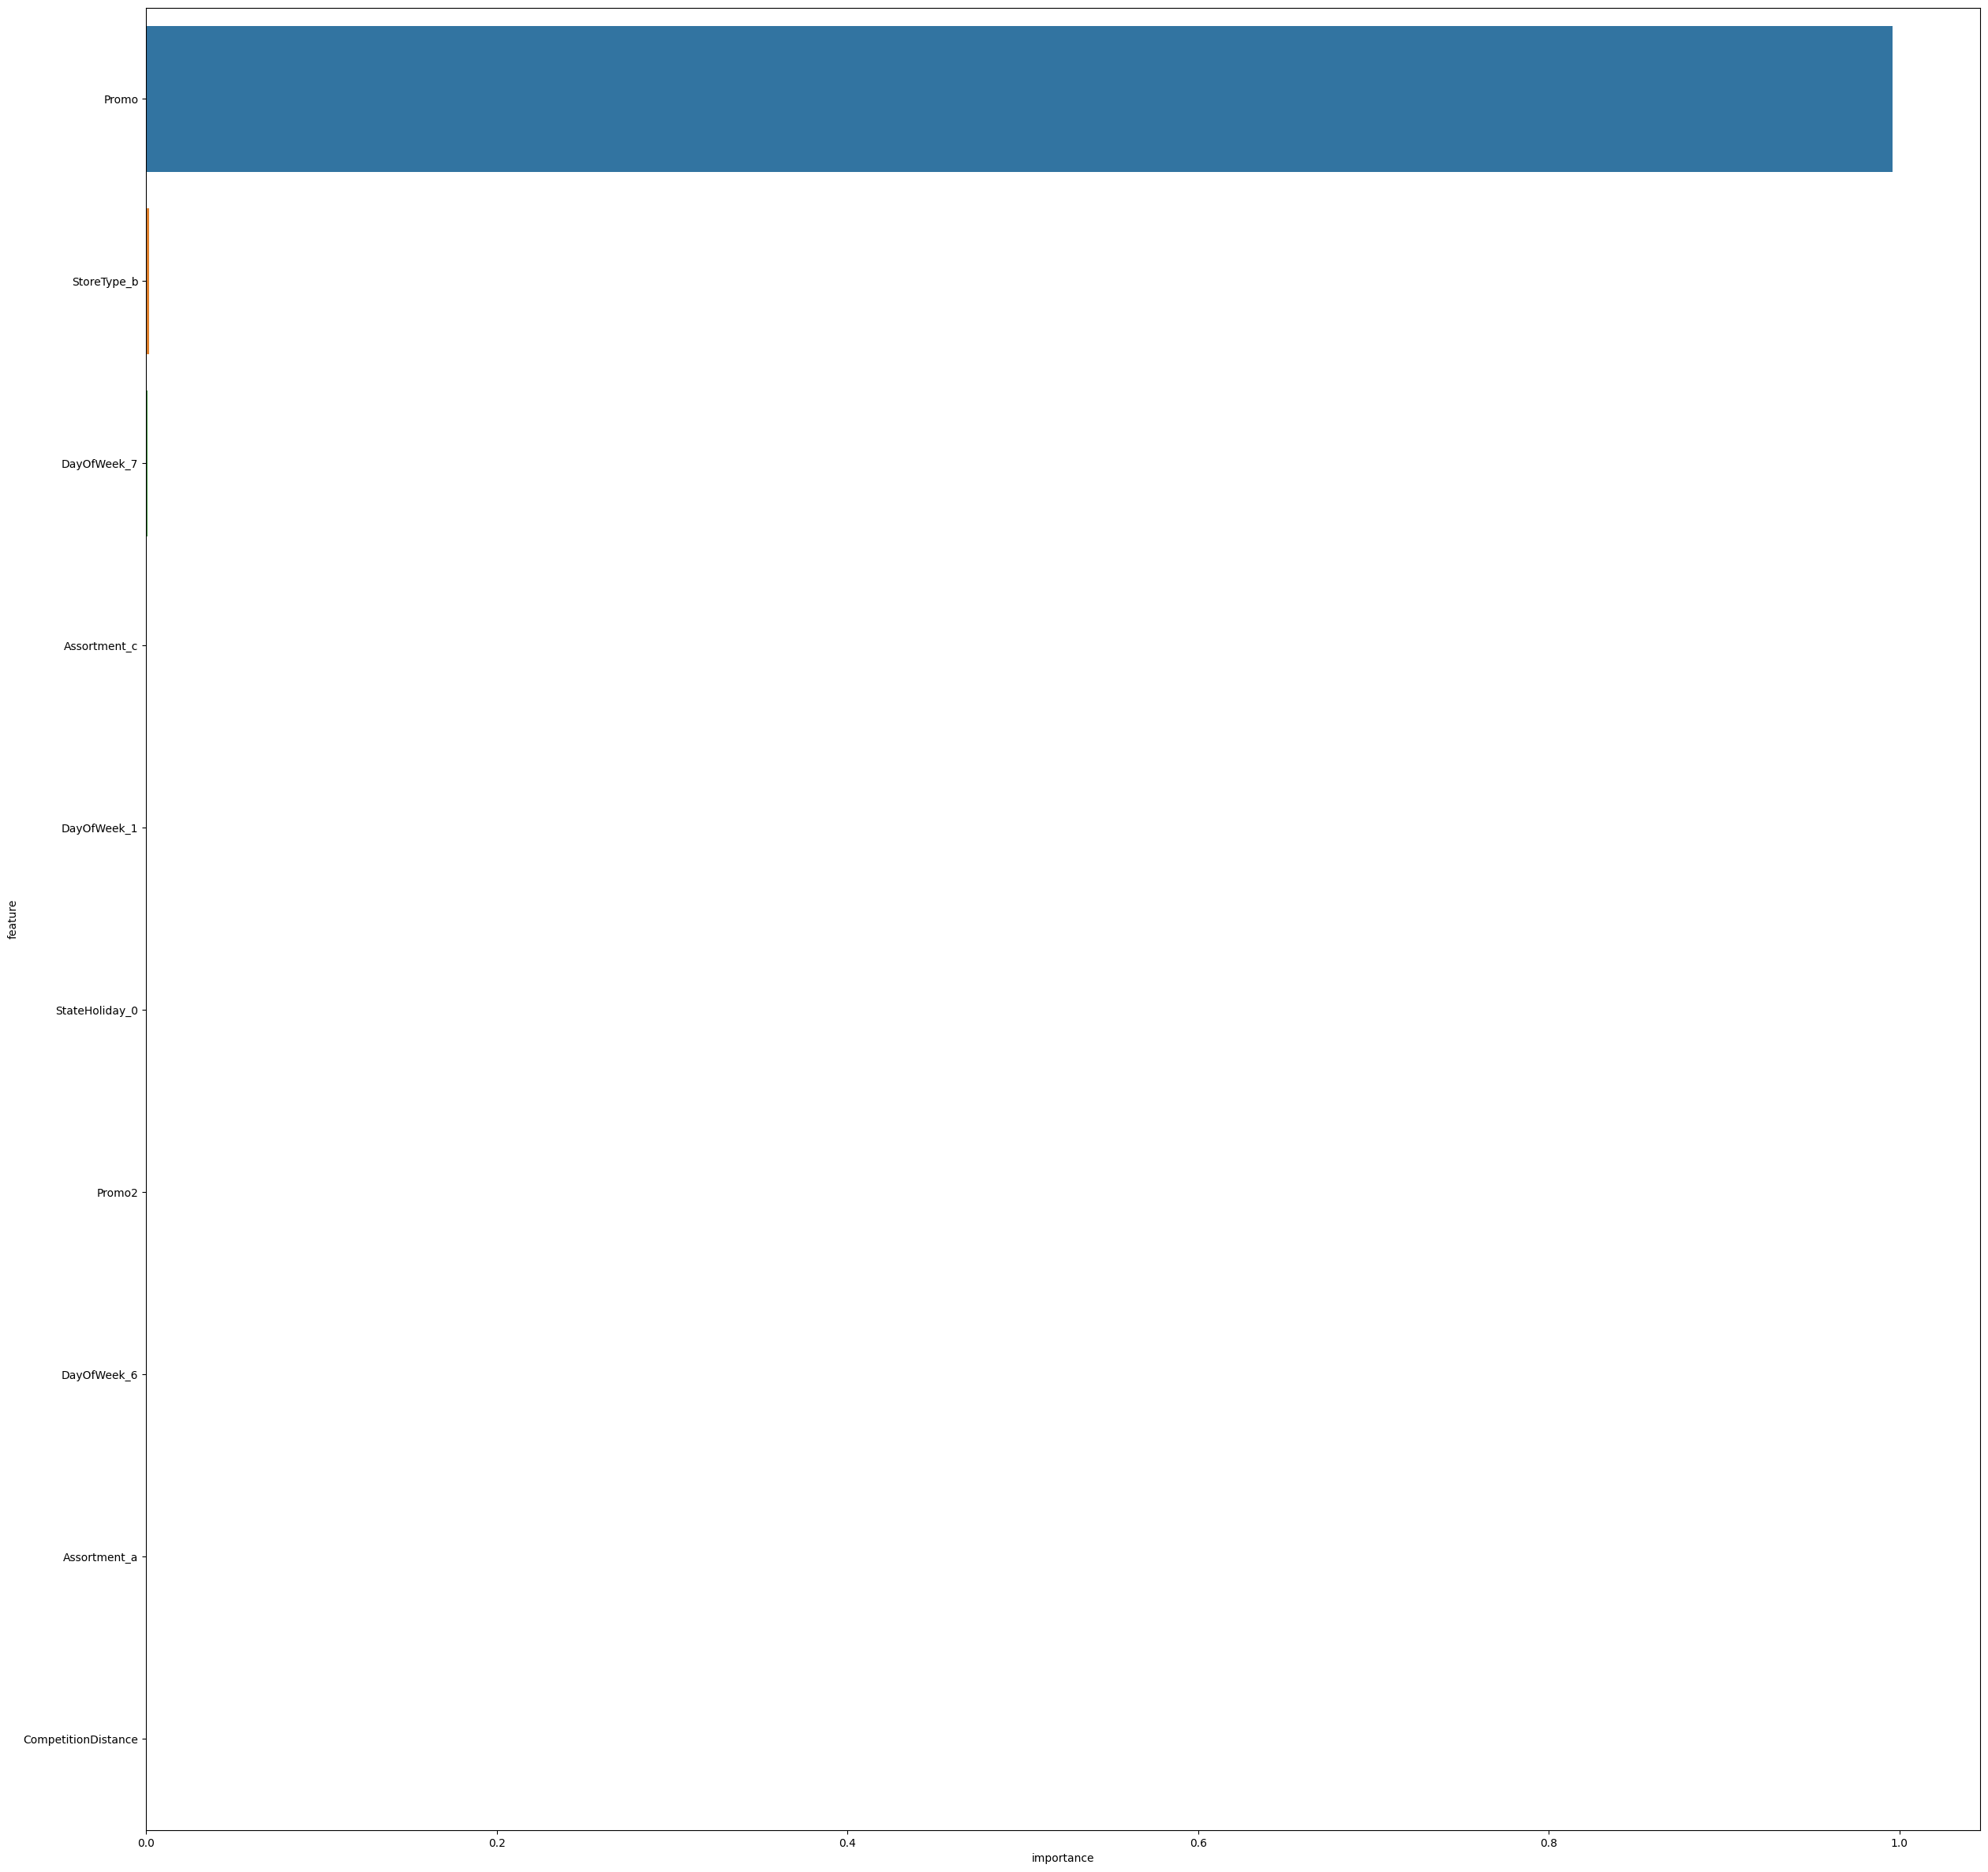

In [ ]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature', hue='feature')


## K-Fold
- For Validation set

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def train_and_eval(X_train, y_train, X_val, y_val, **params):
  model = XGBRegressor(random_state=42, n_jobs=-1, **params)
  model.fit(X_train, y_train)
  train_rmse = rmse(y_train, model.predict(X_train))
  val_rmse = rmse(y_val, model.predict(X_val))
  return model, train_rmse, val_rmse

In [ ]:
kfold = KFold(n_splits=5)

In [ ]:
for i, j in kfold.split(X_train):
  print('i : ', i, ', ', 'j : ', j)

i :  [168879 168880 168881 ... 844389 844390 844391] ,  j :  [     0      1      2 ... 168876 168877 168878]
i :  [     0      1      2 ... 844389 844390 844391] ,  j :  [168879 168880 168881 ... 337755 337756 337757]
i :  [     0      1      2 ... 844389 844390 844391] ,  j :  [337758 337759 337760 ... 506633 506634 506635]
i :  [     0      1      2 ... 844389 844390 844391] ,  j :  [506636 506637 506638 ... 675511 675512 675513]
i :  [     0      1      2 ... 675511 675512 675513] ,  j :  [675514 675515 675516 ... 844389 844390 844391]


In [ ]:
X_train.shape, y_train.shape

((844392, 30), (844392,))

In [ ]:
models = []

for train_idx, val_idx in kfold.split(X_train):
  train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
  val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
  model, train_rmse, val_rmse = train_and_eval(train_x, train_y, val_x, val_y, max_depth=4, n_estimators=20)
  models.append(model)
  print('Train RMSE : ', train_rmse, ', ', 'Validation RMSE : ', val_rmse)


Train RMSE :  2370.7136430479463 ,  Validation RMSE :  2448.739998478758
Train RMSE :  2376.830658491627 ,  Validation RMSE :  2413.5622536102155
Train RMSE :  2386.944071778845 ,  Validation RMSE :  2364.856120007352
Train RMSE :  2348.3401652445446 ,  Validation RMSE :  2458.1552579968957
Train RMSE :  2370.9691440768092 ,  Validation RMSE :  2441.7500928714353


In [ ]:
def predict_avg(models, input):
  return np.mean([model.predict(input) for model in models], axis=0)


In [ ]:
predict_avg(models, X_train)

array([8013.9463, 7508.8916, 8623.156 , ..., 7844.056 , 7589.815 ,
       9704.449 ], dtype=float32)

## Hyperparameter Tuning and Regularization

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.1)


In [ ]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((759952, 30), (84440, 30), (759952,), (84440,))

In [ ]:
def test_params(**params):
  model = XGBRegressor(random_state=42, n_jobs=-1, **params)
  model.fit(X_train, y_train)
  train_rmse = rmse(train_y, model.predict(train_x))
  val_rmse = rmse(val_y, model.predict(val_x))
  return train_rmse, val_rmse

> n_estimators

In [ ]:
test_params(n_estimators=10)

(2332.719085119157, 2353.473583673971)

In [ ]:
test_params(n_estimators=20)

(2025.4160926895283, 2047.3155668947456)

In [ ]:
test_params(n_estimators=40)

(1672.6185436773358, 1693.5546275136012)

In [ ]:
test_params(n_estimators=50)

(1555.8461427767559, 1571.9068760985442)

In [ ]:
test_params(n_estimators=100)

(1162.1318160316596, 1174.682612993254)

In [ ]:
test_params(n_estimators=150)

(1023.8875175111166, 1035.2334679644878)

In [ ]:
test_params(n_estimators=200)

(948.2596292192025, 958.2391668862782)

In [ ]:
test_params(n_estimators=300)

(858.3043080323132, 866.2268826895507)

In [ ]:
test_params(n_estimators=500)

(768.4286828160657, 775.1145033053059)

> max_depth

In [ ]:
test_params(n_estimators=20, max_depth=5)

(2241.6723933344438, 2256.298402331323)

In [ ]:
test_params(n_estimators=30, max_depth=10)

(1074.9789346683037, 1080.9911795537016)

In [ ]:
test_params(n_estimators=40, max_depth=15)

(498.27484134777853, 500.876153014386)

In [ ]:
test_params(n_estimators=30, max_depth=20)

(251.06011474220514, 252.0682367412599)

In [ ]:
test_params(n_estimators=40, max_depth=20)

(176.5255280159422, 176.70976592454284)

> learning_rate

In [ ]:
test_params(n_estimators=20, learning_rate=0.2)

(2260.3857308884953, 2279.614143637965)

In [ ]:
test_params(n_estimators=20, learning_rate=0.2, max_depth=15)

(999.5550888773661, 1004.7577663442136)

In [ ]:
test_params(n_estimators=25, learning_rate=0.2, max_depth=15)

(863.110343167806, 865.4733151353707)

In [ ]:
test_params(n_estimators=25, learning_rate=0.2, max_depth=20)

(436.10273003762273, 435.00919593781646)

In [ ]:
test_params(n_estimators=30, learning_rate=0.2, max_depth=25)

(143.93129290760993, 143.8792298722158)

In [ ]:
test_params(n_estimators=25, learning_rate=0.1, max_depth=20)

(807.7521969845158, 811.5689119481191)

In [ ]:
test_params(n_estimators=25, learning_rate=0.25, max_depth=20)

(368.5648923011745, 370.080518388341)

> booster
- Instead of using Decision Trees, XGBoost can also train a linear model for each iteration, this can be cinfigured using booster

In [ ]:
test_params(booster='gblinear')

(2724.969466450928, 2748.040652291797)

- Play with all the hyperparameter

# Putting it Together and Making Preductions

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, learning_rate=0.25, max_depth=25, subsample=0.9, colsample_bytree=0.7)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
submission_df = pd.read_csv('/content/sample_submission.csv')

In [ ]:
submission_df

In [ ]:
submission_df['Sales']  = test_preds

In [ ]:
test_df.Open.isna().sum()

In [ ]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)


In [ ]:
submission_df

In [ ]:
submission_df.to_csv('submission.csv', index=None)